<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sklearn으로-k-means-클러스터링" data-toc-modified-id="Sklearn으로-k-means-클러스터링-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sklearn으로 k-means 클러스터링</a></span><ul class="toc-item"><li><span><a href="#데이터" data-toc-modified-id="데이터-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터</a></span></li><li><span><a href="#클러스터-할당" data-toc-modified-id="클러스터-할당-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>클러스터 할당</a></span></li><li><span><a href="#예측" data-toc-modified-id="예측-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>예측</a></span></li></ul></li><li><span><a href="#Spark-Clustering" data-toc-modified-id="Spark-Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Spark Clustering</a></span><ul class="toc-item"><li><span><a href="#DataFrame-생성" data-toc-modified-id="DataFrame-생성-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DataFrame 생성</a></span></li><li><span><a href="#Features-설정" data-toc-modified-id="Features-설정-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Features 설정</a></span></li><li><span><a href="#k-means-클러스터링" data-toc-modified-id="k-means-클러스터링-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>k-means 클러스터링</a></span></li><li><span><a href="#클러스터-중심점" data-toc-modified-id="클러스터-중심점-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>클러스터 중심점</a></span></li></ul></li><li><span><a href="#Iris-데이터-클러스터링(군집화)" data-toc-modified-id="Iris-데이터-클러스터링(군집화)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Iris 데이터 클러스터링(군집화)</a></span><ul class="toc-item"><li><span><a href="#데이터" data-toc-modified-id="데이터-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>데이터</a></span></li><li><span><a href="#그래프" data-toc-modified-id="그래프-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>그래프</a></span></li><li><span><a href="#RDD-생성" data-toc-modified-id="RDD-생성-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RDD 생성</a></span></li><li><span><a href="#형변환" data-toc-modified-id="형변환-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>형변환</a></span></li><li><span><a href="#k-Means-모델링" data-toc-modified-id="k-Means-모델링-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>k-Means 모델링</a></span></li><li><span><a href="#DataFrame-생성" data-toc-modified-id="DataFrame-생성-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>DataFrame 생성</a></span></li><li><span><a href="#통계량" data-toc-modified-id="통계량-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>통계량</a></span></li><li><span><a href="#features-생성" data-toc-modified-id="features-생성-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>features 생성</a></span></li><li><span><a href="#k-Means" data-toc-modified-id="k-Means-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>k-Means</a></span></li><li><span><a href="#최적의-클러스터-개수-구하기" data-toc-modified-id="최적의-클러스터-개수-구하기-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>최적의 클러스터 개수 구하기</a></span></li><li><span><a href="#클러스터-개수에-따른-오류-그래프" data-toc-modified-id="클러스터-개수에-따른-오류-그래프-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>클러스터 개수에 따른 오류 그래프</a></span></li></ul></li></ul></div>

In [1]:
# SparkSession 생성
import pyspark
import os

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

## Sklearn으로 k-means 클러스터링

### 데이터

In [2]:
import numpy as np

X = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random', random_state=2).fit(X)

### 클러스터 할당

In [4]:
print ("Cluster label: ", kmeans.labels_)

Cluster label:  [1 1 1 1 0 0 0 0 0]


In [5]:
print ("Centroid: ", kmeans.cluster_centers_)

Centroid:  [[7.8 3.2]
 [3.  5.5]]


### 예측
두 점을 입력하면 예측 가능

In [6]:
print ("Predictions: ", kmeans.predict([[0, 0], [7, 4]]))

Predictions:  [1 0]


## Spark Clustering

In [10]:
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

### DataFrame 생성

In [11]:
_xRdd = spark.sparkContext.parallelize(x)

In [12]:
xRdd = _xRdd.map(lambda x: [int(i) for i in x])

In [13]:
xRdd.collect()

[[2, 5], [3, 6], [2, 4], [5, 7], [7, 2], [8, 3], [9, 4], [8, 4], [7, 3]]

In [14]:
xDf = xRdd.toDF(["x", "y"])
xDf.show()

+---+---+
|  x|  y|
+---+---+
|  2|  5|
|  3|  6|
|  2|  4|
|  5|  7|
|  7|  2|
|  8|  3|
|  9|  4|
|  8|  4|
|  7|  3|
+---+---+



### Features 설정

In [15]:
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["x","y"],outputCol="features")

In [16]:
xxDf = va.transform(xDf)

In [17]:
xxDf.printSchema()

root
 |-- x: long (nullable = true)
 |-- y: long (nullable = true)
 |-- features: vector (nullable = true)



In [18]:
xxDf.show(5)

+---+---+---------+
|  x|  y| features|
+---+---+---------+
|  2|  5|[2.0,5.0]|
|  3|  6|[3.0,6.0]|
|  2|  4|[2.0,4.0]|
|  5|  7|[5.0,7.0]|
|  7|  2|[7.0,2.0]|
+---+---+---------+
only showing top 5 rows



### k-means 클러스터링

In [19]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2)

In [20]:
model = kmeans.fit(xxDf)

### 클러스터 중심점

In [21]:
print (model.clusterCenters())

[array([7.8, 3.2]), array([3. , 5.5])]


## Iris 데이터 클러스터링(군집화)

### 데이터

In [22]:
from sklearn import datasets

dataset = datasets.load_iris()

In [23]:
data = dataset['data']

In [24]:
data[1:5]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 그래프

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_24792/2284455069.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca(projection='3d')


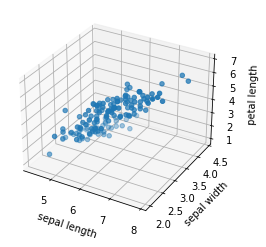

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.figure().gca(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.show()

### RDD 생성

In [26]:
_xRdd = spark.sparkContext.parallelize(data)

In [27]:
_xRdd.take(1)

[array([5.1, 3.5, 1.4, 0.2])]

### 형변환

In [28]:
xRdd = _xRdd.map(lambda x: [float(i) for i in x])

In [29]:
xRdd.take(1)

[[5.1, 3.5, 1.4, 0.2]]

### k-Means 모델링

In [30]:
from pyspark.mllib.clustering import KMeans

model = KMeans.train(xRdd, k = 2, maxIterations = 10) # maxiterations=반복횟수 

중심값 출력

In [31]:
model.clusterCenters

[array([5.00566038, 3.36981132, 1.56037736, 0.29056604]),
 array([6.30103093, 2.88659794, 4.95876289, 1.69587629])]

오류 계산

In [32]:
model.computeCost(xRdd)

152.34795176035803

### DataFrame 생성

In [33]:
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [34]:
import pandas as pd

iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [35]:
irisDf = spark.createDataFrame(iris)

### 통계량

In [36]:
irisDf.describe().show()

+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|       species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



### features 생성

In [37]:
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"], outputCol="features")
xxDf = va.transform(irisDf)

In [38]:
xxDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)
 |-- features: vector (nullable = true)



In [39]:
xxDf.show(3)

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
+------------+-----------+------------+-----------+-----------+-----------------+
only showing top 3 rows



입력데이터가 명목변수이면??

In [40]:
from pyspark.ml.feature import VectorIndexer

featureIndexer = VectorIndexer(inputCol="features", \
                               outputCol="featuresIndexed",\
                               maxCategories=4).fit(xxDf)
xxxDf = featureIndexer.transform(xxDf)

In [41]:
xxxDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- featuresIndexed: vector (nullable = true)



In [42]:
xxxDf.show(5)

+------------+-----------+------------+-----------+-----------+-----------------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|  featuresIndexed|
+------------+-----------+------------+-----------+-----------+-----------------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|[5.0,3.6,1.4,0.2]|
+------------+-----------+------------+-----------+-----------+-----------------+-----------------+
only showing top 5 rows



### k-Means

In [43]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2) \
            .setFeaturesCol("features") \
            .setPredictionCol("cluster")

In [44]:
model = kmeans.fit(xxDf)

In [45]:
print (model.clusterCenters())

[array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00566038, 3.36037736, 1.56226415, 0.28867925])]


In [46]:
model.transform(xxDf).show()

+------------+-----------+------------+-----------+-----------+-----------------+-------+
|sepal_length|sepal_width|petal_length|petal_width|    species|         features|cluster|
+------------+-----------+------------+-----------+-----------+-----------------+-------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|      1|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|      1|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|      1|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|      1|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|      1|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|      1|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|      1|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|      1|
|         

### 최적의 클러스터 개수 구하기
Silhouette : 1에 가까울수록 좋다

In [47]:
from pyspark.ml.evaluation import ClusteringEvaluator
#silhouette = np.zeros(15)
silhouetteList = list()
for i in range(2, 17):
    # Trains a k-means model.
    kmeans = KMeans().setK(i).setFeaturesCol("features")
    model = kmeans.fit(xxDf)
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    predictions = model.transform(xxxDf)
    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator().setMetricName("silhouette")
    silhouette = evaluator.evaluate(predictions)
    #silh_val.append(silhouette)
    print("...{} Within Set Sum of Squared Errors {}".format(i, silhouette))
    silhouetteList.append(silhouette)

...2 Within Set Sum of Squared Errors 0.8501515983265806
...3 Within Set Sum of Squared Errors 0.7342113066202725
...4 Within Set Sum of Squared Errors 0.6711848003790326
...5 Within Set Sum of Squared Errors 0.6693502650358714
...6 Within Set Sum of Squared Errors 0.6438928241588121
...7 Within Set Sum of Squared Errors 0.5348738274527646
...8 Within Set Sum of Squared Errors 0.6172586649457701
...9 Within Set Sum of Squared Errors 0.494507403994743
...10 Within Set Sum of Squared Errors 0.4888408569527127
...11 Within Set Sum of Squared Errors 0.4600942552619037
...12 Within Set Sum of Squared Errors 0.4038335912317261
...13 Within Set Sum of Squared Errors 0.3875002302551008
...14 Within Set Sum of Squared Errors 0.3786055185887995
...15 Within Set Sum of Squared Errors 0.4123630985764056
...16 Within Set Sum of Squared Errors 0.4230354994650789


### 클러스터 개수에 따른 오류 그래프

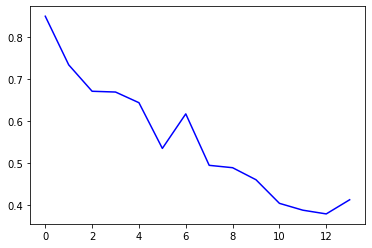

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(14), silhouetteList[0:14], color='blue')